5.다항회귀

Contents
<div id="toc"></div>

# 1. 다항회귀

다항 회귀 (Polynomial Regression)
- 독립변수와 종속변수들 간의 관계를 다차 다항식으로 표현하는 회귀 방식
- 예를 들어, 2개의 독립변수 X1, X2와 종속변수 Y의 관계를  
   Y = w0 + w1X1 + w2X2 + w3X1X2 + w4X1^2 + w5X2^2  
    형태의 다항식으로 표현할 수 있다.
    ![image.png](./img/ch5_1.png)

- 회귀식의 형태가 **독립변수의 선형이 아니기 때문에 비선형 회귀라고 오해**할 수 있으나, 다항 회귀는 **선형 회귀**에 해당한다.
- 선형 회귀와 비선형 회귀를 구분하는 기준은 **회귀 계수들의 형태가 선형인가 비선형인가**의 여부이다. (독립변수의 형태와는 상관 없다.)
- 보다 엄밀하게, 다항 회귀를 선형화 할 수 있는(linearizable) 회귀라고 명명하기도 한다.


- 회귀식의 독립변수들을 각각 새로운 변수로 치환해서 1차 방정식으로 표현할 수 있다.
![image.png](./img/ch5_2.png)
- 따라서 다항 회귀는 다중 선형 회귀와 동일한 절차를 통해서 분석을 수행할 수 있다.
- 단, 비선형 함수를 선형적으로 적용시키는 과정이 선행되어야 한다.

## 1.1. 사이킷런에서 다항식 특성으로의 변환 수행

1. **preprocessing** 모듈에 있는 **PolynomialFeatures**를 이용하여 특성들을 다항식 형태로 변환하는 객체를 생성한다.
    - 매개변수 degree는 변환하려는 다항식의 차수이며, 기본값은 2이다.

In [3]:
import sklearn.preprocessing as pp

# degree = 2 : 2차 다항식   ->   default
poly = pp.PolynomialFeatures(degree=2)

* 원본 특성 데이터는 아래와 같이 [[0, 1] [2, 3]] 배열이다

In [4]:
import numpy as np

X = np.arange(4).reshape(2, 2)   # [0, 1, 2, 3]   -> [ [0, 1], [2, 3] ]

2. 객체에 대해서 **fit_transform** 메소드를 이용하여 변환한다.
    - 매개변수는 원본 특성 집합이다.
    - 반환 결과는 다항식 형태로 변환된 특성 집합이다.

In [100]:
X_poly = poly.fit_transform(X)
# print(X_poly) 

0   1   2    3   
00  01  02   03   
11  12  13   
22  23   
33    

- fit 및 transform을 각각 순서대로 호출해도 무방하다.

In [6]:
poly.fit(X)
X_poly = poly.transform(X)
print(X_poly)

[[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


- 2차 다항식으로 변환된 결과는 원본 특성에 대해서 0차식, 1차식, 2차식을 순서대로 나열한 것이다.


- 원래의 특성을 2차 다항식으로 변환하는 경우
![image.png](./img/ch5_3.png)

- 데이터를 생성하여 확인한다.

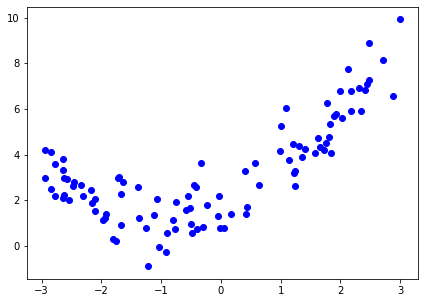

In [23]:
import numpy as np
import matplotlib.pyplot as plt

X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(100,1)
# np.random.randn(100,1) : 데이터에 노이즈를 추가
# 없으면 정직한 2차 함수가 나온다.

plt.figure(figsize=(7, 5))
plt.scatter(X,y,color="blue")

- 비교를 위해 단순 선형 회귀를 실행한다.

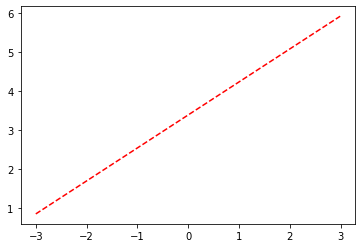

In [24]:
import sklearn.linear_model as lm

X_test = np.arange(-3,3,0.01)[:, np.newaxis]

X1_train = X
y_train = y

# 추정된 회귀모형 반환
reg1 = lm.LinearRegression().fit(X1_train, y_train)

X1_test = X_test
y1_pred = reg1.predict(X1_test)

plt.plot(X_test, y1_pred, color='red', linestyle='--')

- 2차항 형태로 다항 회귀를 실행해 본다.

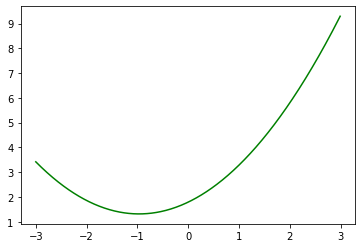

In [25]:
import sklearn.linear_model as lm
import sklearn.preprocessing as pp

X_test = np.arange(-3,3,0.01)[:,np.newaxis]

poly = pp.PolynomialFeatures(degree = 2)
X2_train = poly.fit_transform(X)
y_train = y

reg2 = lm.LinearRegression().fit(X2_train, y_train)

X2_test = poly.fit_transform(X_test)
y2_pred = reg2.predict(X2_test)

plt.plot(X_test, y2_pred, color = "green")

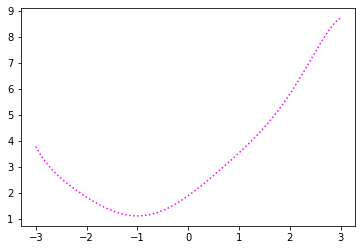

In [26]:
import sklearn.linear_model as lm
import sklearn.preprocessing as pp

X_test = np.arange(-3,3,0.01)[:,np.newaxis]

poly = pp.PolynomialFeatures(degree = 7)
X7_train = poly.fit_transform(X)
y_train = y

reg7 = lm.LinearRegression().fit(X7_train, y_train)

X7_test = poly.fit_transform(X_test)
y7_pred = reg7.predict(X7_test)

plt.plot(X_test, y7_pred, color = "magenta", linestyle = ":")

- 전체적인 결과를 확인한다.

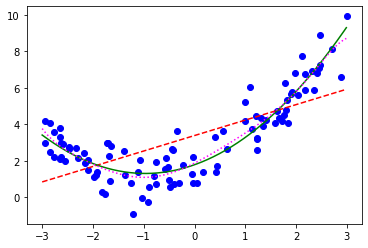

In [27]:
plt.scatter(X,y,color="blue")
plt.plot(X_test, y1_pred, color='red', linestyle='--')
plt.plot(X_test, y2_pred, color = "green")
plt.plot(X_test, y7_pred, color = "magenta", linestyle = ":")

**차수가 높다고 무조건 정확한 예측값이 나오는 것이 아니다**

# 2. 실습

In [60]:
import sklearn.datasets as d
import sklearn.model_selection as ms
import sklearn.linear_model as lm
import sklearn.metrics as mt
import sklearn.preprocessing as pp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 2.1. 자료 생성

In [94]:
# load -> boston과 diabetes가 회귀에 적합함 
boston = d.load_boston()

In [96]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [62]:
X = boston.data[:, 5][:, np.newaxis]
y = boston.target

In [63]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size = 0.3, random_state = 1)

In [64]:
# X좌표값 생성

# xx = np.linspace(min, max)
# X.max(), X.min()
# numpy.linspace(시작점, 끝점, 개수(default : 50)) : linear space를 만드는 함수
xx = np.linspace(X.min()-1 , X.max()+1)   # 전체를 커버하기 위해 +1
xx
# Python 배열은 homogeneous

array([2.561     , 2.70832653, 2.85565306, 3.00297959, 3.15030612,
       3.29763265, 3.44495918, 3.59228571, 3.73961224, 3.88693878,
       4.03426531, 4.18159184, 4.32891837, 4.4762449 , 4.62357143,
       4.77089796, 4.91822449, 5.06555102, 5.21287755, 5.36020408,
       5.50753061, 5.65485714, 5.80218367, 5.9495102 , 6.09683673,
       6.24416327, 6.3914898 , 6.53881633, 6.68614286, 6.83346939,
       6.98079592, 7.12812245, 7.27544898, 7.42277551, 7.57010204,
       7.71742857, 7.8647551 , 8.01208163, 8.15940816, 8.30673469,
       8.45406122, 8.60138776, 8.74871429, 8.89604082, 9.04336735,
       9.19069388, 9.33802041, 9.48534694, 9.63267347, 9.78      ])

In [65]:
xx = np.linspace(X.min()-1 , X.max()+1)[:, np.newaxis]  # 50행 1열 짜리 배열

In [66]:
# 선형모델 생성
lr = lm.LinearRegression()

## 2.2. 단순 선형 회귀

In [67]:
# 1. 단순 선형 회귀
reg1 = lr.fit(X_train, y_train)
y_pred1 = reg1.predict(X_test)

r2_score1 = mt.r2_score(y_test, y_pred1)

yy1 = reg1.predict(xx)

#plt.plot(xx, yy1)

## 2.3. 2차 다항 회귀

In [68]:
# 2. 2차 다항 회귀
# 전처리를 통해 특성을 부풀릴 필요가 있음

###
quad = pp.PolynomialFeatures(degree = 2)  # degree default = 2
X_train2 = quad.fit_transform(X_train)
###

reg2 = lr.fit(X_train2, y_train)

###
X_test2 = quad.fit_transform(X_test)
###

y_pred2 = reg2.predict(X_test2)

r2_score2 = mt.r2_score(y_test, y_pred2)

###
xx2 = quad.fit_transform(xx)
###

yy2 = reg1.predict(xx2)

## 2.4. 3차 다항 회귀

In [69]:
# 3. 3차 다항 회귀

###
cubic = pp.PolynomialFeatures(degree = 3)
X_train3 = cubic.fit_transform(X_train)
###

reg3 = lr.fit(X_train3, y_train)

###
X_test3 = cubic.fit_transform(X_test)
###

y_pred3 = reg3.predict(X_test3)

r2_score3 = mt.r2_score(y_test, y_pred3)

###
xx3 = cubic.fit_transform(xx)
###

yy3 = reg1.predict(xx3)

## 2.5. 결정계수 비교

In [98]:
print("단순 선형 회귀 :",r2_score1)
print(" 2차 선형 회귀 :",r2_score2)
print(" 3차 선형 회귀 :",r2_score3)

단순 선형 회귀 : 0.6015774471545621
 2차 선형 회귀 : 0.6670629868010137
 3차 선형 회귀 : 0.6667764542233331


## 2.6. 결과

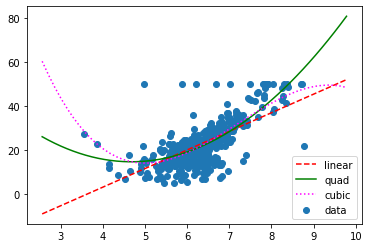

In [91]:
# Y축 - 집 가격
# X축 - 방의 수

plt.scatter(X, y, label = 'data')
plt.plot(xx, yy1, color = 'red', linestyle='--', label = 'linear')
plt.plot(xx, yy2, color = 'green', label = 'quad')
plt.plot(xx, yy3, color = 'magenta', linestyle = ':', label = 'cubic')
plt.legend()

- **1차는 분산된 데이터를 커버를 하지 못한다.**   
- **결정계수에 따르면 2차가 3차보다 좋다**

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>